In [3]:
#!pip install wordcloud

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_excel("dataset_extremist.xlsx").sample(500)
df.head()

,comments,extremist
4548,চুরি করে দেশটা বানিয়েছে ফক ফকা সে দেশে জিনিসের...,no
3975,দালাল মিডিয়া কুত্তালীগ এর নাম নিতে কি চুলকাই,yes
2520,যেখানে সরকার জড়িত থাকে সেখানে সাত খুন মাফ,yes
2709,বিএনপি দেশের মধ্যে বিশৃঙ্খলা সৃষ্টির পাঁয়তারা ...,yes
3446,অনেক সুন্দর আলোচনা ধন্যবাদ ভাই আপনাকে সটিক কথা...,no


In [3]:
df["extremist"].value_counts()

extremist
no     269
yes    231
Name: count, dtype: int64

In [4]:
extremist_pos = df[df["extremist"]== "yes"]
extremist_negtv = df[df["extremist"]== "no"]

In [5]:
extremist_pos

,comments,extremist
3975,দালাল মিডিয়া কুত্তালীগ এর নাম নিতে কি চুলকাই,yes
2520,যেখানে সরকার জড়িত থাকে সেখানে সাত খুন মাফ,yes
2709,বিএনপি দেশের মধ্যে বিশৃঙ্খলা সৃষ্টির পাঁয়তারা ...,yes
1664,"তাহলে তো স্যার, বন্দুক যুদ্ধ শুরু হবে হয়তো!",yes
2765,আওয়ামী জালিমদের বিচার এক দিন হবে।,yes
...,...,...
4702,তাই সরকারের প্রতিদ্বন্দী হিসেবে বিএনপি অকেজো।...,yes
120,ভোট চোর রিজার্ভের বিলিয়ন ডলার ও গিলে খেলো।,yes
3541,ছাত্রলীগ কলঙ্ক মুইছ্যা নিষ্পাপ হইয়া গেলো,yes
3306,সেইটাতো অব্যশই!একবার বিনাভোটের নির্বাচন আরেকবা...,yes


In [6]:
extremist_negtv

,comments,extremist
4548,চুরি করে দেশটা বানিয়েছে ফক ফকা সে দেশে জিনিসের...,no
3446,অনেক সুন্দর আলোচনা ধন্যবাদ ভাই আপনাকে সটিক কথা...,no
3958,"তোমরা কোন দেশে থাকো,",no
3615,একদম ঠিক কথা বলেছে ধন্যবাদ আপু চালিয়ে যান সবাই...,no
579,বাংলাদেশ আওয়ামী লীগ গণতন্ত্রে বিশ্বাসী।,no
...,...,...
3360,ধন্যবাদ আপনাকে অভিনন্দন জানাইতেছি আপনাকে সত্য ...,no
152,আল্লাহ যেন আপনার কথাটা সত্যি করে।,no
4167,খেলা একটু জমবে,no
4921,জনগণ সুস্থ্য মস্তিষ্ক সম্পূর্ণ নেতাদেরকে রাষ্ট...,no


In [7]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='extremist', ylabel='count'>

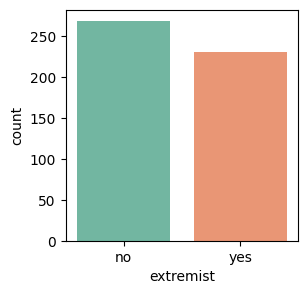

In [8]:
plt.figure(figsize=(3,3))
sns.countplot(x = "extremist" , data = df, palette= "Set2")

In [10]:
# Bengali stopwords list (expandable)
bengali_stopwords = set([
    "এই", "ওই", "যে", "তারা", "সে", "এবং", "তা", "কি", "করা", "করেছে", "ছিল", "হয়", "না", "হবে", "আমরা", "তুমি"
])
bengali_stopwords

{'আমরা',
 'এই',
 'এবং',
 'ওই',
 'করা',
 'করেছে',
 'কি',
 'ছিল',
 'তা',
 'তারা',
 'তুমি',
 'না',
 'যে',
 'সে',
 'হবে',
 'হয়'}

In [11]:
# word cloud 
extremist_pos = list(df[df["extremist"]== "yes"]["comments"])
extremist_negtv = list(df[df["extremist"]== "no"]["comments"])

In [12]:
def create_cloud(string, title=None):
    font_path = "C:/Users/user/Downloads/static/NotoSansBengali_Condensed-Black.ttf"  # Replace this with the correct path to the Bengali font file
    cloud = WordCloud(height=1080,
                      width=1800,
                      background_color="black",
                      min_font_size=10,
                      stopwords=STOPWORDS,
                      font_path=font_path).generate(string)
    
    plt.figure(figsize=(10, 20))
    plt.imshow(cloud)
    plt.axis("off")
    if title:
        plt.title(title, fontdict={"fontsize": 24})
    plt.show()

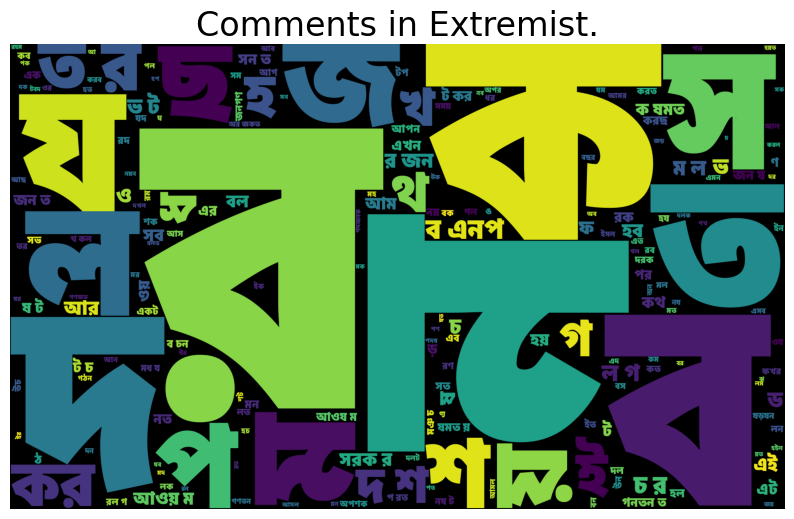

In [13]:
create_cloud(" ".join(extremist_pos).lower(), "Comments in Extremist.")

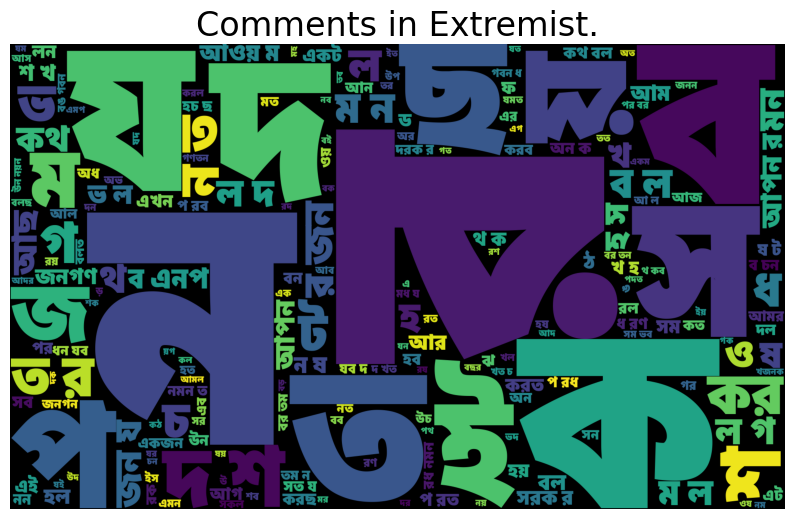

In [14]:
create_cloud(" ".join(extremist_negtv).lower(), "Comments in Extremist.")

In [28]:
#!pip install lxml

In [17]:
from bs4 import BeautifulSoup
import re

# Bengali stopwords list (expandable)
bengali_stopwords = set([
    "এই", "ওই", "যে", "তারা", "সে", "এবং", "তা", "কি", "করা", "করেছে", "ছিল", "হয়", "না", "হবে", "আমরা", "তুমি"
])

def text_processing_bengali(data):
    preprocessed_comments = []
    
    for sentence in df['comments']:
        # Remove URLs
        sentence = re.sub(r"http\S+", "", sentence)
        # Strip HTML
        sentence = BeautifulSoup(sentence, 'lxml').get_text()
        # Remove numbers and punctuations
        sentence = re.sub(r"[0-9]", "", sentence)
        sentence = re.sub(r"[^\u0980-\u09FF\s]", " ", sentence)  # Only keep Bengali characters and spaces
        # Remove extra whitespaces and stopwords
        sentence = ' '.join(word for word in sentence.split() if word not in bengali_stopwords)
        preprocessed_comments.append(sentence.strip())
    
    return preprocessed_comments

In [18]:
x = text_processing_bengali(df["comments"])

In [19]:
df["clean_text"] = x

In [20]:
df.head()

,comments,extremist,clean_text
4548,চুরি করে দেশটা বানিয়েছে ফক ফকা সে দেশে জিনিসের...,no,চুরি করে দেশটা বানিয়েছে ফক ফকা দেশে জিনিসের দা...
3975,দালাল মিডিয়া কুত্তালীগ এর নাম নিতে কি চুলকাই,yes,দালাল মিডিয়া কুত্তালীগ এর নাম নিতে চুলকাই
2520,যেখানে সরকার জড়িত থাকে সেখানে সাত খুন মাফ,yes,যেখানে সরকার জড়িত থাকে সেখানে সাত খুন মাফ
2709,বিএনপি দেশের মধ্যে বিশৃঙ্খলা সৃষ্টির পাঁয়তারা ...,yes,বিএনপি দেশের মধ্যে বিশৃঙ্খলা সৃষ্টির পাঁয়তারা ...
3446,অনেক সুন্দর আলোচনা ধন্যবাদ ভাই আপনাকে সটিক কথা...,no,অনেক সুন্দর আলোচনা ধন্যবাদ ভাই আপনাকে সটিক কথা...


In [21]:
df["extremist"]= df["extremist"].replace({"no": 0, "yes": 1})

In [22]:
df.head()

,comments,extremist,clean_text
4548,চুরি করে দেশটা বানিয়েছে ফক ফকা সে দেশে জিনিসের...,0,চুরি করে দেশটা বানিয়েছে ফক ফকা দেশে জিনিসের দা...
3975,দালাল মিডিয়া কুত্তালীগ এর নাম নিতে কি চুলকাই,1,দালাল মিডিয়া কুত্তালীগ এর নাম নিতে চুলকাই
2520,যেখানে সরকার জড়িত থাকে সেখানে সাত খুন মাফ,1,যেখানে সরকার জড়িত থাকে সেখানে সাত খুন মাফ
2709,বিএনপি দেশের মধ্যে বিশৃঙ্খলা সৃষ্টির পাঁয়তারা ...,1,বিএনপি দেশের মধ্যে বিশৃঙ্খলা সৃষ্টির পাঁয়তারা ...
3446,অনেক সুন্দর আলোচনা ধন্যবাদ ভাই আপনাকে সটিক কথা...,0,অনেক সুন্দর আলোচনা ধন্যবাদ ভাই আপনাকে সটিক কথা...


In [23]:
x = df["clean_text"]
y = df["extremist"]

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=.2, random_state=42)

In [25]:
xtest.shape, xtrain.shape

((100,), (400,))

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
c_vec = TfidfVectorizer(max_features=13, ngram_range=(1,2))
new_xtrain = c_vec.fit_transform(xtrain)
new_xtest = c_vec.transform(xtest)

In [55]:
new_xtrain.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
new_xtest.shape

(100, 13)

In [57]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()

In [58]:
model = mn.fit(new_xtrain, ytrain)

In [59]:
model.score(new_xtrain, ytrain)

0.6175

In [60]:
model.score(new_xtest, ytest)

0.54

In [61]:
y_prediction = model.predict(new_xtest)
y_prediction

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [62]:
from sklearn.metrics import classification_report
report = classification_report(y_prediction, ytest)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.55      0.60        64
           1       0.40      0.53      0.45        36

    accuracy                           0.54       100
   macro avg       0.53      0.54      0.53       100
weighted avg       0.57      0.54      0.55       100



In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_prediction, ytest)
cm

array([[35, 29],
       [17, 19]], dtype=int64)

<Axes: >

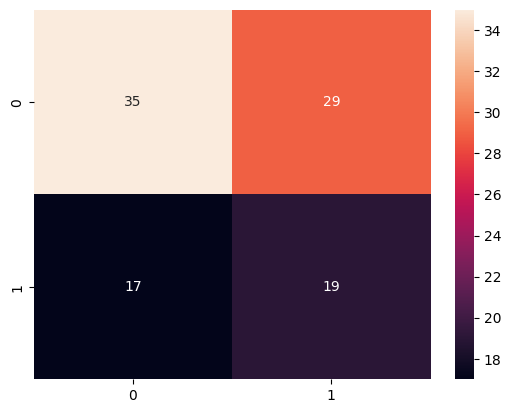

In [64]:
sns.heatmap(cm, annot= True)

In [65]:
#model save 
import pickle 
model1 = pickle.dump(model ,open("model_mDB.pkl","wb"))

In [66]:
# vector save 
vec_model =  pickle.dump(c_vec ,open("c_mDB.pkl","wb"))

In [67]:
# model load 

NB_model = pickle.load(open("model_mDB.pkl", "rb"))
vec_model = pickle.load(open("c_mDB.pkl", "rb"))

In [68]:
NB_model.score(new_xtrain, ytrain)

0.6175

In [69]:
test_text ="বাংলাদেশে সকল রক্তক্ষয়ী সংঘর্ষের নেপথ্যে বিএনপি।"

In [70]:
def clean_bengali_review(review):
    # Bengali stopwords list (expandable)
    bengali_stopwords = set([
    "এই", "ওই", "যে", "তারা", "সে", "এবং", "তা", "কি", "করা", "করেছে", "ছিল", "হয়", "না", "হবে", "আমরা", "তুমি"
    ])

    # Step 1: Remove HTML
    review = BeautifulSoup(str(review), 'html.parser').get_text()

    # Step 2: Remove URLs
    review = re.sub(r"http\S+", "", review)

    # Step 3: Remove English characters, punctuation, digits; keep only Bengali characters
    review = re.sub(r'[^\u0980-\u09FF\s]', ' ', review)

    # Step 4: Normalize spaces
    review = re.sub(r'\s+', ' ', review).strip()

    # Step 5: Remove Bengali stopwords
    review = ' '.join(word for word in review.split() if word not in bengali_stopwords)

    return review

In [71]:
clean_text = clean_bengali_review(test_text)

In [72]:
clean_text

'বাংলাদেশে সকল রক্তক্ষয়ী সংঘর্ষের নেপথ্যে বিএনপি'

In [73]:
# Transform and predict sentiment on the test text
test_vector = vec_model.fit_transform([test_text])
prediction = NB_model.predict(test_vector)

print("Predicted Sentiment:", prediction[0])

Predicted Sentiment: 0
